In [1]:
#IMPORT NECESSARY LIBRARY
import pandas as pd
import numpy as np
from scipy import stats

import warnings # Used to supressed the warnings
warnings.filterwarnings('ignore')

In [2]:
#LOADING PREPROCESS DATA
data = pd.read_csv('employee_efficiency_analysis_preprocessed_data.csv')
pd.set_option('display.max_columns',None) # Used to display the all features
data.drop('Unnamed: 0',axis=1,inplace=True) # Drop unwanted feature
data.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,PerformanceRating
0,-1.767402,0.676441,-1.167993,-0.851935,0.205579,-1.460274,1.014249,-0.664216,0.710983,0.225247,-0.461743,1.101382,-1.080122,3
1,-0.216820,1.644249,-0.662568,0.931494,1.845667,-0.016368,1.505612,-0.782890,-0.189284,1.357759,-1.048929,0.127712,-0.235444,3
2,2.461306,3.408206,-1.679160,0.166316,0.245072,1.427942,1.291152,0.899282,-1.272198,-0.353911,-1.904379,0.172446,-1.757408,4
3,0.807016,3.802775,1.248267,-1.221907,-0.366836,-0.068040,-0.224407,-0.344578,0.518090,0.088507,-0.161038,0.846755,1.466246,3
4,5.802571,-0.575917,1.885541,2.000293,0.009020,0.057411,1.545573,-0.195816,0.889081,0.411710,-0.768734,-0.733301,0.964284,3


In [3]:
#DEFINE INDEPENDANT & DEPENDANT FEATURES
X = data.iloc[:,:-1]
y = data.PerformanceRating

In [4]:
X.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13
0,-1.767402,0.676441,-1.167993,-0.851935,0.205579,-1.460274,1.014249,-0.664216,0.710983,0.225247,-0.461743,1.101382,-1.080122
1,-0.216820,1.644249,-0.662568,0.931494,1.845667,-0.016368,1.505612,-0.782890,-0.189284,1.357759,-1.048929,0.127712,-0.235444
2,2.461306,3.408206,-1.679160,0.166316,0.245072,1.427942,1.291152,0.899282,-1.272198,-0.353911,-1.904379,0.172446,-1.757408
3,0.807016,3.802775,1.248267,-1.221907,-0.366836,-0.068040,-0.224407,-0.344578,0.518090,0.088507,-0.161038,0.846755,1.466246
4,5.802571,-0.575917,1.885541,2.000293,0.009020,0.057411,1.545573,-0.195816,0.889081,0.411710,-0.768734,-0.733301,0.964284


In [5]:
y.head()

0    3
1    3
2    4
3    3
4    3
Name: PerformanceRating, dtype: int64

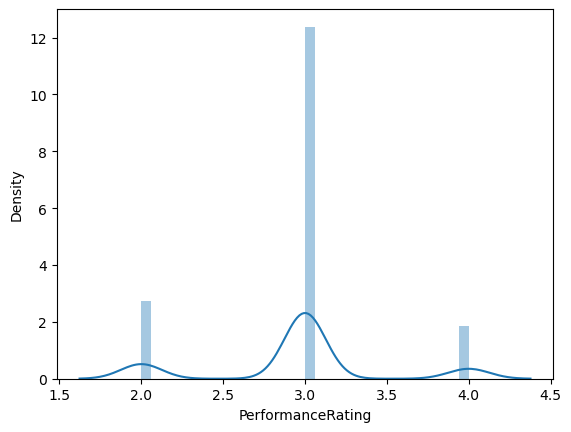

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
 
# count plot on single categorical variable
sns.distplot(y)
 
# Show the plot
plt.show()

In [7]:
from collections import Counter
from imblearn.over_sampling import SMOTE #SMOTE(synthetic minority oversampling techinque)
sm = SMOTE() # obeject creation
print("unbalanced data   :  ",Counter(y))
X_sm,y_sm = sm.fit_resample(X,y)
print("balanced data:    :",Counter(y_sm))
#Now target feature in balance

unbalanced data   :   Counter({3: 874, 2: 194, 4: 132})
balanced data:    : Counter({3: 874, 4: 874, 2: 874})


In [8]:
#SPLIT TRAINING AND TESTING DATA
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_sm,y_sm,test_size=0.20) # 20% data given to testing

In [9]:
# Check shape of train and test
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2097, 13), (525, 13), (2097,), (525,))

In [10]:
#1.Support Vector Machine
# importing library
from sklearn.svm import SVC

# Object Creaation
svc = SVC()

# Fitting training and testing data
svc.fit(X_train,y_train)

# Prediction on train data
svc_train_predict = svc.predict(X_train)

# Prediction on test data
svc_test_predict = svc.predict(X_test)

In [11]:
#TRAINING ACCURACY
# import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,classification_report,confusion_matrix
svc_train_accuracy = accuracy_score(svc_train_predict,y_train)
print("Training accuracy of support vector classifier model",svc_train_accuracy*100)
print("support vector classifier Classification report: \n",classification_report(svc_train_predict,y_train))

Training accuracy of support vector classifier model 95.61278016213639
support vector classifier Classification report: 
               precision    recall  f1-score   support

           2       1.00      0.95      0.97       735
           3       0.91      0.95      0.93       656
           4       0.96      0.97      0.96       706

    accuracy                           0.96      2097
   macro avg       0.96      0.96      0.96      2097
weighted avg       0.96      0.96      0.96      2097



In [12]:
#TESTING ACCURACY
svc_test_accuracy = accuracy_score(svc_test_predict,y_test)
print("Testing accuracy of support vector classifier model",svc_test_accuracy*100)
print("support vector classifier Classification report: \n",classification_report(svc_test_predict,y_test))

Testing accuracy of support vector classifier model 92.19047619047619
support vector classifier Classification report: 
               precision    recall  f1-score   support

           2       0.98      0.89      0.94       195
           3       0.83      0.94      0.88       165
           4       0.96      0.94      0.95       165

    accuracy                           0.92       525
   macro avg       0.92      0.92      0.92       525
weighted avg       0.93      0.92      0.92       525



In [13]:
#CONFUSION MATRIX
pd.crosstab(svc_test_predict,y_test)

PerformanceRating,2,3,4
row_0,,,
2,174,21,0
3,3,155,7
4,0,10,155


In [14]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(svc, X_train, y_train, cv=10))

[0.92380952 0.93809524 0.94761905 0.95714286 0.94285714 0.9047619
 0.93333333 0.93301435 0.94258373 0.93779904]


In [15]:
#In testing score is still lagging so we are going to do hyperparameter tunning with the help of grid search cv

In [16]:
#HYPER PARAMETER TUNNING WITH GRID SEARCH CV
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1,0.5,10,50,60,70,80],
             'gamma':[1,0.1,0.001,0.0001,0.00001],
             'random_state':(list(range(1,20)))}
model = SVC() # Object creation
grid = GridSearchCV(model,param_grid,refit=True,verbose=2,scoring='f1',cv=5)

# Step:10 fitting the model for grid search
grid.fit(X,y)

Fitting 5 folds for each of 665 candidates, totalling 3325 fits
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.1s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.1s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.1s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.1s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.1s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.1s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.1s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.1s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.1s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.1s
[CV] END .....................C=0.1, gamma=1, random_state=3; total time=   0.1s
[CV] END .....................C=0.1, gamma=1,

[CV] END ...................C=0.1, gamma=0.1, random_state=2; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=2; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ...................

[CV] END .................C=0.1, gamma=0.001, random_state=4; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=4; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=4; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=4; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=4; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=5; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=5; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=5; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=5; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=5; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=6; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=6; total time=   0.0s
[CV] END .................C=

[CV] END ................C=0.1, gamma=0.0001, random_state=5; total time=   0.0s
[CV] END ................C=0.1, gamma=0.0001, random_state=5; total time=   0.0s
[CV] END ................C=0.1, gamma=0.0001, random_state=5; total time=   0.0s
[CV] END ................C=0.1, gamma=0.0001, random_state=6; total time=   0.0s
[CV] END ................C=0.1, gamma=0.0001, random_state=6; total time=   0.0s
[CV] END ................C=0.1, gamma=0.0001, random_state=6; total time=   0.0s
[CV] END ................C=0.1, gamma=0.0001, random_state=6; total time=   0.0s
[CV] END ................C=0.1, gamma=0.0001, random_state=6; total time=   0.0s
[CV] END ................C=0.1, gamma=0.0001, random_state=7; total time=   0.0s
[CV] END ................C=0.1, gamma=0.0001, random_state=7; total time=   0.0s
[CV] END ................C=0.1, gamma=0.0001, random_state=7; total time=   0.0s
[CV] END ................C=0.1, gamma=0.0001, random_state=7; total time=   0.0s
[CV] END ................C=0

[CV] END .................C=0.1, gamma=1e-05, random_state=6; total time=   0.0s
[CV] END .................C=0.1, gamma=1e-05, random_state=7; total time=   0.0s
[CV] END .................C=0.1, gamma=1e-05, random_state=7; total time=   0.0s
[CV] END .................C=0.1, gamma=1e-05, random_state=7; total time=   0.0s
[CV] END .................C=0.1, gamma=1e-05, random_state=7; total time=   0.0s
[CV] END .................C=0.1, gamma=1e-05, random_state=7; total time=   0.0s
[CV] END .................C=0.1, gamma=1e-05, random_state=8; total time=   0.0s
[CV] END .................C=0.1, gamma=1e-05, random_state=8; total time=   0.0s
[CV] END .................C=0.1, gamma=1e-05, random_state=8; total time=   0.0s
[CV] END .................C=0.1, gamma=1e-05, random_state=8; total time=   0.0s
[CV] END .................C=0.1, gamma=1e-05, random_state=8; total time=   0.0s
[CV] END .................C=0.1, gamma=1e-05, random_state=9; total time=   0.0s
[CV] END .................C=

[CV] END .....................C=0.5, gamma=1, random_state=8; total time=   0.1s
[CV] END .....................C=0.5, gamma=1, random_state=8; total time=   0.1s
[CV] END .....................C=0.5, gamma=1, random_state=8; total time=   0.1s
[CV] END .....................C=0.5, gamma=1, random_state=9; total time=   0.1s
[CV] END .....................C=0.5, gamma=1, random_state=9; total time=   0.1s
[CV] END .....................C=0.5, gamma=1, random_state=9; total time=   0.1s
[CV] END .....................C=0.5, gamma=1, random_state=9; total time=   0.1s
[CV] END .....................C=0.5, gamma=1, random_state=9; total time=   0.1s
[CV] END ....................C=0.5, gamma=1, random_state=10; total time=   0.1s
[CV] END ....................C=0.5, gamma=1, random_state=10; total time=   0.1s
[CV] END ....................C=0.5, gamma=1, random_state=10; total time=   0.1s
[CV] END ....................C=0.5, gamma=1, random_state=10; total time=   0.1s
[CV] END ...................

[CV] END ...................C=0.5, gamma=0.1, random_state=9; total time=   0.0s
[CV] END ..................C=0.5, gamma=0.1, random_state=10; total time=   0.0s
[CV] END ..................C=0.5, gamma=0.1, random_state=10; total time=   0.0s
[CV] END ..................C=0.5, gamma=0.1, random_state=10; total time=   0.0s
[CV] END ..................C=0.5, gamma=0.1, random_state=10; total time=   0.0s
[CV] END ..................C=0.5, gamma=0.1, random_state=10; total time=   0.0s
[CV] END ..................C=0.5, gamma=0.1, random_state=11; total time=   0.0s
[CV] END ..................C=0.5, gamma=0.1, random_state=11; total time=   0.0s
[CV] END ..................C=0.5, gamma=0.1, random_state=11; total time=   0.0s
[CV] END ..................C=0.5, gamma=0.1, random_state=11; total time=   0.0s
[CV] END ..................C=0.5, gamma=0.1, random_state=11; total time=   0.0s
[CV] END ..................C=0.5, gamma=0.1, random_state=12; total time=   0.0s
[CV] END ..................C

[CV] END ................C=0.5, gamma=0.001, random_state=11; total time=   0.0s
[CV] END ................C=0.5, gamma=0.001, random_state=11; total time=   0.0s
[CV] END ................C=0.5, gamma=0.001, random_state=11; total time=   0.0s
[CV] END ................C=0.5, gamma=0.001, random_state=11; total time=   0.0s
[CV] END ................C=0.5, gamma=0.001, random_state=12; total time=   0.0s
[CV] END ................C=0.5, gamma=0.001, random_state=12; total time=   0.0s
[CV] END ................C=0.5, gamma=0.001, random_state=12; total time=   0.0s
[CV] END ................C=0.5, gamma=0.001, random_state=12; total time=   0.0s
[CV] END ................C=0.5, gamma=0.001, random_state=12; total time=   0.0s
[CV] END ................C=0.5, gamma=0.001, random_state=13; total time=   0.0s
[CV] END ................C=0.5, gamma=0.001, random_state=13; total time=   0.0s
[CV] END ................C=0.5, gamma=0.001, random_state=13; total time=   0.0s
[CV] END ................C=0

[CV] END ...............C=0.5, gamma=0.0001, random_state=12; total time=   0.0s
[CV] END ...............C=0.5, gamma=0.0001, random_state=13; total time=   0.0s
[CV] END ...............C=0.5, gamma=0.0001, random_state=13; total time=   0.0s
[CV] END ...............C=0.5, gamma=0.0001, random_state=13; total time=   0.0s
[CV] END ...............C=0.5, gamma=0.0001, random_state=13; total time=   0.0s
[CV] END ...............C=0.5, gamma=0.0001, random_state=13; total time=   0.0s
[CV] END ...............C=0.5, gamma=0.0001, random_state=14; total time=   0.0s
[CV] END ...............C=0.5, gamma=0.0001, random_state=14; total time=   0.0s
[CV] END ...............C=0.5, gamma=0.0001, random_state=14; total time=   0.0s
[CV] END ...............C=0.5, gamma=0.0001, random_state=14; total time=   0.0s
[CV] END ...............C=0.5, gamma=0.0001, random_state=14; total time=   0.0s
[CV] END ...............C=0.5, gamma=0.0001, random_state=15; total time=   0.0s
[CV] END ...............C=0.

[CV] END ................C=0.5, gamma=1e-05, random_state=14; total time=   0.0s
[CV] END ................C=0.5, gamma=1e-05, random_state=14; total time=   0.0s
[CV] END ................C=0.5, gamma=1e-05, random_state=14; total time=   0.0s
[CV] END ................C=0.5, gamma=1e-05, random_state=15; total time=   0.0s
[CV] END ................C=0.5, gamma=1e-05, random_state=15; total time=   0.0s
[CV] END ................C=0.5, gamma=1e-05, random_state=15; total time=   0.0s
[CV] END ................C=0.5, gamma=1e-05, random_state=15; total time=   0.0s
[CV] END ................C=0.5, gamma=1e-05, random_state=15; total time=   0.0s
[CV] END ................C=0.5, gamma=1e-05, random_state=16; total time=   0.0s
[CV] END ................C=0.5, gamma=1e-05, random_state=16; total time=   0.0s
[CV] END ................C=0.5, gamma=1e-05, random_state=16; total time=   0.0s
[CV] END ................C=0.5, gamma=1e-05, random_state=16; total time=   0.0s
[CV] END ................C=0

[CV] END .....................C=10, gamma=1, random_state=15; total time=   0.1s
[CV] END .....................C=10, gamma=1, random_state=16; total time=   0.1s
[CV] END .....................C=10, gamma=1, random_state=16; total time=   0.1s
[CV] END .....................C=10, gamma=1, random_state=16; total time=   0.1s
[CV] END .....................C=10, gamma=1, random_state=16; total time=   0.1s
[CV] END .....................C=10, gamma=1, random_state=16; total time=   0.1s
[CV] END .....................C=10, gamma=1, random_state=17; total time=   0.1s
[CV] END .....................C=10, gamma=1, random_state=17; total time=   0.1s
[CV] END .....................C=10, gamma=1, random_state=17; total time=   0.1s
[CV] END .....................C=10, gamma=1, random_state=17; total time=   0.1s
[CV] END .....................C=10, gamma=1, random_state=17; total time=   0.1s
[CV] END .....................C=10, gamma=1, random_state=18; total time=   0.1s
[CV] END ...................

[CV] END ...................C=10, gamma=0.1, random_state=17; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=17; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=17; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=18; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=18; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=18; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=18; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=18; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=19; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=19; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=19; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=19; total time=   0.0s
[CV] END ...................

[CV] END .................C=10, gamma=0.001, random_state=19; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=19; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=19; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=19; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=1; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=1; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=1; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=1; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=1; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END .................C=

[CV] END ..................C=10, gamma=1e-05, random_state=1; total time=   0.1s
[CV] END ..................C=10, gamma=1e-05, random_state=1; total time=   0.0s
[CV] END ..................C=10, gamma=1e-05, random_state=2; total time=   0.0s
[CV] END ..................C=10, gamma=1e-05, random_state=2; total time=   0.0s
[CV] END ..................C=10, gamma=1e-05, random_state=2; total time=   0.0s
[CV] END ..................C=10, gamma=1e-05, random_state=2; total time=   0.0s
[CV] END ..................C=10, gamma=1e-05, random_state=2; total time=   0.0s
[CV] END ..................C=10, gamma=1e-05, random_state=3; total time=   0.0s
[CV] END ..................C=10, gamma=1e-05, random_state=3; total time=   0.0s
[CV] END ..................C=10, gamma=1e-05, random_state=3; total time=   0.0s
[CV] END ..................C=10, gamma=1e-05, random_state=3; total time=   0.0s
[CV] END ..................C=10, gamma=1e-05, random_state=3; total time=   0.0s
[CV] END ..................C

[CV] END ......................C=50, gamma=1, random_state=3; total time=   0.1s
[CV] END ......................C=50, gamma=1, random_state=3; total time=   0.1s
[CV] END ......................C=50, gamma=1, random_state=3; total time=   0.1s
[CV] END ......................C=50, gamma=1, random_state=3; total time=   0.1s
[CV] END ......................C=50, gamma=1, random_state=3; total time=   0.1s
[CV] END ......................C=50, gamma=1, random_state=4; total time=   0.1s
[CV] END ......................C=50, gamma=1, random_state=4; total time=   0.1s
[CV] END ......................C=50, gamma=1, random_state=4; total time=   0.1s
[CV] END ......................C=50, gamma=1, random_state=4; total time=   0.1s
[CV] END ......................C=50, gamma=1, random_state=4; total time=   0.1s
[CV] END ......................C=50, gamma=1, random_state=5; total time=   0.1s
[CV] END ......................C=50, gamma=1, random_state=5; total time=   0.1s
[CV] END ...................

[CV] END ....................C=50, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=5; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=5; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=5; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=5; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=5; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=6; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=6; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=6; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=6; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=6; total time=   0.0s
[CV] END ...................

[CV] END ..................C=50, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ..................C

[CV] END .................C=50, gamma=0.0001, random_state=8; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=8; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=8; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=8; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=8; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=9; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=9; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=9; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=9; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=9; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=10; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=10; total time=   0.0s
[CV] END ................C=5

[CV] END ..................C=50, gamma=1e-05, random_state=9; total time=   0.0s
[CV] END ..................C=50, gamma=1e-05, random_state=9; total time=   0.0s
[CV] END .................C=50, gamma=1e-05, random_state=10; total time=   0.0s
[CV] END .................C=50, gamma=1e-05, random_state=10; total time=   0.0s
[CV] END .................C=50, gamma=1e-05, random_state=10; total time=   0.0s
[CV] END .................C=50, gamma=1e-05, random_state=10; total time=   0.0s
[CV] END .................C=50, gamma=1e-05, random_state=10; total time=   0.0s
[CV] END .................C=50, gamma=1e-05, random_state=11; total time=   0.0s
[CV] END .................C=50, gamma=1e-05, random_state=11; total time=   0.0s
[CV] END .................C=50, gamma=1e-05, random_state=11; total time=   0.0s
[CV] END .................C=50, gamma=1e-05, random_state=11; total time=   0.0s
[CV] END .................C=50, gamma=1e-05, random_state=11; total time=   0.0s
[CV] END .................C=

[CV] END .....................C=60, gamma=1, random_state=11; total time=   0.1s
[CV] END .....................C=60, gamma=1, random_state=11; total time=   0.1s
[CV] END .....................C=60, gamma=1, random_state=11; total time=   0.1s
[CV] END .....................C=60, gamma=1, random_state=11; total time=   0.1s
[CV] END .....................C=60, gamma=1, random_state=12; total time=   0.2s
[CV] END .....................C=60, gamma=1, random_state=12; total time=   0.1s
[CV] END .....................C=60, gamma=1, random_state=12; total time=   0.1s
[CV] END .....................C=60, gamma=1, random_state=12; total time=   0.1s
[CV] END .....................C=60, gamma=1, random_state=12; total time=   0.1s
[CV] END .....................C=60, gamma=1, random_state=13; total time=   0.1s
[CV] END .....................C=60, gamma=1, random_state=13; total time=   0.1s
[CV] END .....................C=60, gamma=1, random_state=13; total time=   0.1s
[CV] END ...................

[CV] END ...................C=60, gamma=0.1, random_state=13; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=13; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=13; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=13; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=13; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=15; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=15; total time=   0.0s
[CV] END ...................

[CV] END .................C=60, gamma=0.001, random_state=15; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=15; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=15; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=15; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=15; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=16; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=16; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=16; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=16; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=16; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=17; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=17; total time=   0.0s
[CV] END .................C=

[CV] END ................C=60, gamma=0.0001, random_state=16; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=16; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=16; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=17; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=17; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=17; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=17; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=17; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=18; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=18; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=18; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=18; total time=   0.0s
[CV] END ................C=6

[CV] END .................C=60, gamma=1e-05, random_state=18; total time=   0.0s
[CV] END .................C=60, gamma=1e-05, random_state=18; total time=   0.0s
[CV] END .................C=60, gamma=1e-05, random_state=18; total time=   0.0s
[CV] END .................C=60, gamma=1e-05, random_state=18; total time=   0.0s
[CV] END .................C=60, gamma=1e-05, random_state=18; total time=   0.0s
[CV] END .................C=60, gamma=1e-05, random_state=19; total time=   0.0s
[CV] END .................C=60, gamma=1e-05, random_state=19; total time=   0.0s
[CV] END .................C=60, gamma=1e-05, random_state=19; total time=   0.0s
[CV] END .................C=60, gamma=1e-05, random_state=19; total time=   0.0s
[CV] END .................C=60, gamma=1e-05, random_state=19; total time=   0.0s
[CV] END ......................C=70, gamma=1, random_state=1; total time=   0.1s
[CV] END ......................C=70, gamma=1, random_state=1; total time=   0.1s
[CV] END ...................

[CV] END .....................C=70, gamma=1, random_state=19; total time=   0.1s
[CV] END .....................C=70, gamma=1, random_state=19; total time=   0.1s
[CV] END .....................C=70, gamma=1, random_state=19; total time=   0.1s
[CV] END ....................C=70, gamma=0.1, random_state=1; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=1; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=1; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=1; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=1; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=2; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=2; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=2; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=2; total time=   0.0s
[CV] END ...................

[CV] END ..................C=70, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=2; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=2; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=2; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=2; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=2; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=3; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=3; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=3; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=3; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=3; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=4; total time=   0.0s
[CV] END ..................C

[CV] END .................C=70, gamma=0.0001, random_state=3; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=3; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=4; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=4; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=4; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=4; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=4; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=5; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=5; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=5; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=5; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=5; total time=   0.0s
[CV] END .................C=

[CV] END ..................C=70, gamma=1e-05, random_state=5; total time=   0.0s
[CV] END ..................C=70, gamma=1e-05, random_state=5; total time=   0.0s
[CV] END ..................C=70, gamma=1e-05, random_state=5; total time=   0.0s
[CV] END ..................C=70, gamma=1e-05, random_state=6; total time=   0.0s
[CV] END ..................C=70, gamma=1e-05, random_state=6; total time=   0.0s
[CV] END ..................C=70, gamma=1e-05, random_state=6; total time=   0.0s
[CV] END ..................C=70, gamma=1e-05, random_state=6; total time=   0.0s
[CV] END ..................C=70, gamma=1e-05, random_state=6; total time=   0.0s
[CV] END ..................C=70, gamma=1e-05, random_state=7; total time=   0.0s
[CV] END ..................C=70, gamma=1e-05, random_state=7; total time=   0.0s
[CV] END ..................C=70, gamma=1e-05, random_state=7; total time=   0.0s
[CV] END ..................C=70, gamma=1e-05, random_state=7; total time=   0.0s
[CV] END ..................C

[CV] END ......................C=80, gamma=1, random_state=7; total time=   0.1s
[CV] END ......................C=80, gamma=1, random_state=7; total time=   0.1s
[CV] END ......................C=80, gamma=1, random_state=7; total time=   0.1s
[CV] END ......................C=80, gamma=1, random_state=7; total time=   0.1s
[CV] END ......................C=80, gamma=1, random_state=7; total time=   0.1s
[CV] END ......................C=80, gamma=1, random_state=8; total time=   0.1s
[CV] END ......................C=80, gamma=1, random_state=8; total time=   0.1s
[CV] END ......................C=80, gamma=1, random_state=8; total time=   0.1s
[CV] END ......................C=80, gamma=1, random_state=8; total time=   0.1s
[CV] END ......................C=80, gamma=1, random_state=8; total time=   0.1s
[CV] END ......................C=80, gamma=1, random_state=9; total time=   0.1s
[CV] END ......................C=80, gamma=1, random_state=9; total time=   0.1s
[CV] END ...................

[CV] END ....................C=80, gamma=0.1, random_state=8; total time=   0.0s
[CV] END ....................C=80, gamma=0.1, random_state=8; total time=   0.0s
[CV] END ....................C=80, gamma=0.1, random_state=8; total time=   0.0s
[CV] END ....................C=80, gamma=0.1, random_state=9; total time=   0.0s
[CV] END ....................C=80, gamma=0.1, random_state=9; total time=   0.0s
[CV] END ....................C=80, gamma=0.1, random_state=9; total time=   0.0s
[CV] END ....................C=80, gamma=0.1, random_state=9; total time=   0.0s
[CV] END ....................C=80, gamma=0.1, random_state=9; total time=   0.0s
[CV] END ...................C=80, gamma=0.1, random_state=10; total time=   0.0s
[CV] END ...................C=80, gamma=0.1, random_state=10; total time=   0.0s
[CV] END ...................C=80, gamma=0.1, random_state=10; total time=   0.0s
[CV] END ...................C=80, gamma=0.1, random_state=10; total time=   0.0s
[CV] END ...................

[CV] END .................C=80, gamma=0.001, random_state=10; total time=   0.0s
[CV] END .................C=80, gamma=0.001, random_state=10; total time=   0.0s
[CV] END .................C=80, gamma=0.001, random_state=10; total time=   0.0s
[CV] END .................C=80, gamma=0.001, random_state=10; total time=   0.0s
[CV] END .................C=80, gamma=0.001, random_state=10; total time=   0.0s
[CV] END .................C=80, gamma=0.001, random_state=11; total time=   0.0s
[CV] END .................C=80, gamma=0.001, random_state=11; total time=   0.0s
[CV] END .................C=80, gamma=0.001, random_state=11; total time=   0.0s
[CV] END .................C=80, gamma=0.001, random_state=11; total time=   0.0s
[CV] END .................C=80, gamma=0.001, random_state=11; total time=   0.0s
[CV] END .................C=80, gamma=0.001, random_state=12; total time=   0.0s
[CV] END .................C=80, gamma=0.001, random_state=12; total time=   0.0s
[CV] END .................C=

[CV] END ................C=80, gamma=0.0001, random_state=11; total time=   0.0s
[CV] END ................C=80, gamma=0.0001, random_state=12; total time=   0.0s
[CV] END ................C=80, gamma=0.0001, random_state=12; total time=   0.0s
[CV] END ................C=80, gamma=0.0001, random_state=12; total time=   0.0s
[CV] END ................C=80, gamma=0.0001, random_state=12; total time=   0.0s
[CV] END ................C=80, gamma=0.0001, random_state=12; total time=   0.0s
[CV] END ................C=80, gamma=0.0001, random_state=13; total time=   0.0s
[CV] END ................C=80, gamma=0.0001, random_state=13; total time=   0.0s
[CV] END ................C=80, gamma=0.0001, random_state=13; total time=   0.0s
[CV] END ................C=80, gamma=0.0001, random_state=13; total time=   0.0s
[CV] END ................C=80, gamma=0.0001, random_state=13; total time=   0.0s
[CV] END ................C=80, gamma=0.0001, random_state=14; total time=   0.0s
[CV] END ................C=8

[CV] END .................C=80, gamma=1e-05, random_state=13; total time=   0.0s
[CV] END .................C=80, gamma=1e-05, random_state=14; total time=   0.0s
[CV] END .................C=80, gamma=1e-05, random_state=14; total time=   0.0s
[CV] END .................C=80, gamma=1e-05, random_state=14; total time=   0.0s
[CV] END .................C=80, gamma=1e-05, random_state=14; total time=   0.0s
[CV] END .................C=80, gamma=1e-05, random_state=14; total time=   0.0s
[CV] END .................C=80, gamma=1e-05, random_state=15; total time=   0.0s
[CV] END .................C=80, gamma=1e-05, random_state=15; total time=   0.0s
[CV] END .................C=80, gamma=1e-05, random_state=15; total time=   0.0s
[CV] END .................C=80, gamma=1e-05, random_state=15; total time=   0.0s
[CV] END .................C=80, gamma=1e-05, random_state=15; total time=   0.0s
[CV] END .................C=80, gamma=1e-05, random_state=16; total time=   0.0s
[CV] END .................C=

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 0.5, 10, 50, 60, 70, 80],
                         'gamma': [1, 0.1, 0.001, 0.0001, 1e-05],
                         'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19]},
             scoring='f1', verbose=2)

In [17]:
# set the best parameter 
clf =SVC(C=0.6,gamma=0.1,random_state=1)

# fit the model
clf.fit(X_train,y_train)

# Predict the x test
y_hat_clf = clf.predict(X_test)

In [18]:
#TESTING ACCURACY AFTER HYPERPARAMETER TUNNING
test_accuracy = accuracy_score(y_hat_clf,y_test)
print("Testing accuracy of support vector classifier model",test_accuracy*100)
print("support vector classifier Classification report: \n",classification_report(y_hat_clf,y_test))

Testing accuracy of support vector classifier model 93.71428571428572
support vector classifier Classification report: 
               precision    recall  f1-score   support

           2       0.98      0.91      0.94       192
           3       0.87      0.95      0.91       169
           4       0.97      0.96      0.96       164

    accuracy                           0.94       525
   macro avg       0.94      0.94      0.94       525
weighted avg       0.94      0.94      0.94       525



In [19]:
#CONFUSION MATRIX
pd.crosstab(y_hat_clf,y_test)

PerformanceRating,2,3,4
row_0,,,
2,174,18,0
3,3,161,5
4,0,7,157


In [20]:
#2.Random Forest
# importing libary and creating object
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100) # 100 decision tree

# fitting training data
rf.fit(X_train,y_train)

# Prediction on testing data
rf_test_predict = rf.predict(X_test)

# Prediction on training data
rf_train_predict = rf.predict(X_train)

In [21]:
#TRANING ACCURACY
rf_train_accuracy = accuracy_score(rf_train_predict,y_train)
print("Training accuracy of random forest",rf_train_accuracy)
print("Classification report of training: \n",classification_report(rf_train_predict,y_train))

Training accuracy of random forest 1.0
Classification report of training: 
               precision    recall  f1-score   support

           2       1.00      1.00      1.00       697
           3       1.00      1.00      1.00       688
           4       1.00      1.00      1.00       712

    accuracy                           1.00      2097
   macro avg       1.00      1.00      1.00      2097
weighted avg       1.00      1.00      1.00      2097



In [22]:
#TESTING ACCURACY
rf_test_accuracy = accuracy_score(rf_test_predict,y_test)
print("Testing accuracy of random forest",rf_test_accuracy*100)
print("Classification report of testing: \n",classification_report(rf_test_predict,y_test))

Testing accuracy of random forest 93.33333333333333
Classification report of testing: 
               precision    recall  f1-score   support

           2       0.97      0.92      0.94       186
           3       0.87      0.94      0.90       171
           4       0.98      0.94      0.96       168

    accuracy                           0.93       525
   macro avg       0.94      0.93      0.93       525
weighted avg       0.94      0.93      0.93       525



In [23]:
#CONFUSION MATRIX
pd.crosstab(rf_test_predict,y_test)

PerformanceRating,2,3,4
row_0,,,
2,171,15,0
3,6,161,4
4,0,10,158


In [24]:
#HYPER PARAMETER TUNNING WITH RANDOMIZED SEARCH CV
# import library and imputation of parameter
from sklearn.model_selection import RandomizedSearchCV  
#In random forest we are not used grid search CV because of memory reason.

n_estimators = [int(x) for x in np.linspace(start=100 ,stop=2000, num=10)] #No of decision tree in forest
max_features = ['auto', 'sqrt'] #Max no of feature consider to create decision tree
max_depth    = [int(x) for x in np.linspace(10,100,num=11)] #Max no of level in each decision tree
max_depth.append(None)
min_samples_split = [2,3,5,8] #Min number of data points placed in a node before the node is split
min_samples_leaf  = [1,2,3,4]  #Min number of data point allowed in leaf node

# Creating dictionary of paramter
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

# Object creation
rf_clf = RandomForestClassifier(random_state=42) #Provide random state because select rows and columns randomly

# Create Random search CV with parameter
rf_cv = RandomizedSearchCV(estimator=rf_clf,scoring='f1',param_distributions=random_grid,
                           n_iter=10,cv=2,verbose=2,random_state=1,n_jobs=-1)

# Fitting the training data
rf_cv.fit(X_train,y_train)

# Get best parameter
rf_best_params = rf_cv.best_params_
print(f"Best parameter: {rf_best_params}")

Fitting 2 folds for each of 10 candidates, totalling 20 fits
Best parameter: {'n_estimators': 311, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_features': 'auto', 'max_depth': 37}


In [25]:
# Create object and place the best paramter
rf_clf1 = RandomForestClassifier(**rf_best_params)

# Fitting the training data
rf_clf1.fit(X_train,y_train)

# Prediction on test data
rf_clf1_predict = rf_clf1.predict(X_test)

In [26]:
#TEST ACCURACY AFTER HYPER-PARAMETER TUNNING
rf_accuracy = accuracy_score(rf_clf1_predict,y_test)
print("Accuracy after hyperparameter tunning",rf_accuracy*100)
print("Classification report: \n",classification_report(rf_clf1_predict,y_test))

Accuracy after hyperparameter tunning 93.14285714285714
Classification report: 
               precision    recall  f1-score   support

           2       0.97      0.92      0.94       185
           3       0.87      0.94      0.90       172
           4       0.97      0.93      0.95       168

    accuracy                           0.93       525
   macro avg       0.93      0.93      0.93       525
weighted avg       0.93      0.93      0.93       525



In [27]:
#CONFUSION MATRIX
pd.crosstab(rf_clf1_predict,y_test)

PerformanceRating,2,3,4
row_0,,,
2,171,14,0
3,6,161,5
4,0,11,157


In [28]:
#3.Artificial Neural Network [MLP Classifier]
# Importing library and object creation
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(60,3),
                      learning_rate='constant',
                      max_iter=250,
                      random_state=42)

In [29]:
# Fitting the training data
model.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(60, 3), max_iter=250, random_state=42)

In [30]:
# Predicting the probability
mlp_prdict_probability = model.predict_proba(X_test)
mlp_prdict_probability

array([[1.15149993e-06, 9.99998848e-01, 7.87379823e-11],
       [9.93020461e-01, 6.97953539e-03, 3.66188424e-09],
       [2.79794835e-03, 1.11297352e-04, 9.97090754e-01],
       ...,
       [8.64656091e-02, 6.01138366e-01, 3.12396025e-01],
       [1.55399148e-03, 9.98446007e-01, 1.59113560e-09],
       [9.89261265e-01, 1.07381615e-02, 5.73151743e-07]])

In [31]:
# Prediction on test data
mlp_test_predict = model.predict(X_test)

# Prediction on training data
mlp_train_predict = model.predict(X_train)

In [32]:
#TRAINING ACCURACY
mlp_train_accuracy = accuracy_score(mlp_train_predict,y_train)
print("Training accuracy of MLP model is:",mlp_train_accuracy*100)
print("Classification report of training:"'\n',classification_report(mlp_train_predict,y_train))

Training accuracy of MLP model is: 98.85550786838341
Classification report of training:
               precision    recall  f1-score   support

           2       1.00      1.00      1.00       700
           3       0.97      1.00      0.98       664
           4       1.00      0.97      0.99       733

    accuracy                           0.99      2097
   macro avg       0.99      0.99      0.99      2097
weighted avg       0.99      0.99      0.99      2097



In [33]:
#TESTING ACCURACY
mlp_test_accuracy = accuracy_score(mlp_test_predict,y_test)
print("Testing accuracy of MLP model is:",mlp_test_accuracy*100)
print("Classification report of testing:"'\n',classification_report(mlp_test_predict,y_test))

Testing accuracy of MLP model is: 93.71428571428572
Classification report of testing:
               precision    recall  f1-score   support

           2       0.99      0.91      0.95       193
           3       0.85      0.97      0.91       163
           4       0.98      0.94      0.96       169

    accuracy                           0.94       525
   macro avg       0.94      0.94      0.94       525
weighted avg       0.94      0.94      0.94       525



In [34]:
#CONFUSION MATRIX
pd.crosstab(mlp_test_predict,y_test)

PerformanceRating,2,3,4
row_0,,,
2,175,18,0
3,2,158,3
4,0,10,159


In [36]:
#MODEL SAVING
# saving model with the help of pickle
import pickle

file = open('mlp_classifier_model.pkl','wb')
pickle.dump(model,file)